In [ ]:
#코드, 단계별로 나누고,각 단계마다 ① 코드 의미와 ② 왜 필요한지를 초보자 기준으로 설명.

In [ ]:
#long 데이터 만들기

In [ ]:
#pew.csv 파일을 판다스의 데이터 프레임으로 불러온다. read_csv 괄호에 만약 이미지 파일 들어가면? 에러난다. type을 통해 데이터프레임임을 확인한다.
df = pd.read_csv('./data/pew.csv')
type(df)

pandas.core.frame.DataFrame

In [ ]:
#데이터프레임에서 컬럼 이름을 확인한다.
df.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

In [61]:
#데이터프레임의 상세정보와 상단 2개행만 불러들인다.
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76


In [ ]:
#데이터 프레임에서 religion열을 고정으로 두고 나머지 열을 녹여 religion열에 붙인다. sort_values('religion')은 religion 기준 오름차순이라는 뜻. 오름차순이 기본값이다. 상단에서 18개 행만 가져온다.
#즉, 이작업은 종교(religion)를 기준으로 데이터를 길게 변환한 뒤, 종교별로 정렬해서 일부만 확인하는 작업이다.
#variable은 녹기전의 열값이고, value는 녹기전 열값이다. melt는 절대 더하지 않는다. 위치만 옮긴 것이다.
df.melt(id_vars='religion').sort_values('religion').head(18)

,religion,variable,value
0,Agnostic,<$10k,27
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96
126,Agnostic,$100-150k,109
36,Agnostic,$20-30k,60
108,Agnostic,$75-100k,122
18,Agnostic,$10-20k,34
90,Agnostic,$50-75k,137
72,Agnostic,$40-50k,76
54,Agnostic,$30-40k,81


In [ ]:
#데이터프레임에서 melt한 테이블을 df_melt 변수에 저장하고 그 내용을 출력한다.
df_melt = df.melt(id_vars='religion')
df_melt

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [ ]:
#df_melt는 상단에 melt된 데이터 프레임을 저장한 변수이고 그 안에서 relgion을 인덱싱해서 시리즈가 나오는데, 그 시리즈 안에 있는 값들 중 Agnostic과 같은지 비교하여 True, False가 만들어진다.
#이 True, False가 들어간 시리즈를 cond라는 변수에 저장한다.
# cond만 쓰면 true, false 다 나온다. 그런데 loc[cond]로 하는 순간 cond안에 들어간 불리언 연산자중 true만 불러온다. 즉, true값이 있는 religion만 불러온다. variable과 value 열값은 그대로 가져온다.
cond=df_melt['religion'] == 'Agnostic'
df_melt.loc[cond]

,religion,variable,value
0,Agnostic,<$10k,27
18,Agnostic,$10-20k,34
36,Agnostic,$20-30k,60
54,Agnostic,$30-40k,81
72,Agnostic,$40-50k,76
90,Agnostic,$50-75k,137
108,Agnostic,$75-100k,122
126,Agnostic,$100-150k,109
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96


In [70]:
# melt로 변형된 데이터프레임 df_melt에서 컬럼 이름 variable을 income으로, value를 count로 변경하고, 그 결과를 df_melt_rename 변수에 저장한다.
df_melt_rename = df_melt.rename(
    columns={'variable':'income', 'value':'count'}
)
df_melt_rename

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [ ]:
#melt할 때 바로 컬럼명을 지정하는 경우이다, id_vars는 기준열, var->income으로, value-> count로 바꾼다.
df_melt_new = df.melt(
    id_vars='religion',
    var_name='income',
    value_name='count'
)
df_melt_new

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [ ]:
#melt로 변형된 데이터 프레임 de_melt_new를 피봇하여 테이블을 변경한다. pandas에서 index는 행을 구분하는 이름표이다. religion이라는 열을 선택하여 그 열 안의 값들이 행(index)이 되도록 하고, income에 들어있던 값들을 columns 값으로 배치하고, 배치된 column값에 count값을 넣는다. 
# 여기에 .reset_index()를 쓴다. 인덱스를 리셋하는 메서드로 이걸 해주지 않으면 religion이라는 단어가 열 타이틀이 아닌 인덱스안에 들어가 있는 상황이 된다. 위로 끌어올려 열 타이틀이 되게 한다.
df_pivot = df_melt_new.pivot(
    index='religion',
    columns='income',
    values='count'
).reset_index()
df_pivot

income,religion,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
0,Agnostic,34,109,60,81,76,137,122,27,84,96
1,Atheist,27,59,37,52,35,70,73,12,74,76
2,Buddhist,21,39,30,34,33,58,62,27,53,54
3,Catholic,617,792,732,670,638,1116,949,418,633,1489
4,Don’t know/refused,14,17,15,11,10,35,21,15,18,116
5,Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
6,Hindu,9,48,7,9,11,34,47,1,54,37
7,Historically Black Prot,244,81,236,238,197,223,131,228,78,339
8,Jehovah's Witness,27,11,24,24,21,30,15,20,6,37
9,Jewish,19,87,25,25,30,95,69,19,151,162


In [ ]:
# pivot_table은 데이터를 집계해서 표로 만드는 함수이다. index: religion 열의 값들을 행 기준으로 사용하겠다. columns: income 열의 값들을 열 기준으로 사용하겠다. values: olumn에 들어갈 값value는 count 값을 배치시킨다. 
# aggfunc는 aggregation function (집계 함수) 의 줄임말이다. 값이 여러 개일 때, 하나로 어떻게 요약할지 정하는 함수이며, aggfunc='min'는 같은 religion × income 조합이 여러 개면, 그중에서 count의 최소값을 사용하라는 뜻이다.
df_pivot = df_melt_new.pivot_table(
    index='religion',
    columns='income',
    values='count',
    aggfunc='min'
)
df_pivot

income,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
religion,,,,,,,,,,
Agnostic,34,109,60,81,76,137,122,27,84,96
Atheist,27,59,37,52,35,70,73,12,74,76
Buddhist,21,39,30,34,33,58,62,27,53,54
Catholic,617,792,732,670,638,1116,949,418,633,1489
Don’t know/refused,14,17,15,11,10,35,21,15,18,116
Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
Hindu,9,48,7,9,11,34,47,1,54,37
Historically Black Prot,244,81,236,238,197,223,131,228,78,339
Jehovah's Witness,27,11,24,24,21,30,15,20,6,37


In [ ]:
#Billboard 데이터 – Long Data 연습

In [74]:
#billboard.csv 데이터를 판다스에서 데이터프레임으로 읽어들이고 그 데이터프레임에 대한 정보를 알려주고, 상단 두개 행만 가져와
billboard_df = pd.read_csv('./data/billboard.csv')
billboard_df.info()
billboard_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   wk1           317 non-null    int64  
 6   wk2           312 non-null    float64
 7   wk3           307 non-null    float64
 8   wk4           300 non-null    float64
 9   wk5           292 non-null    float64
 10  wk6           280 non-null    float64
 11  wk7           269 non-null    float64
 12  wk8           260 non-null    float64
 13  wk9           253 non-null    float64
 14  wk10          244 non-null    float64
 15  wk11          236 non-null    float64
 16  wk12          222 non-null    float64
 17  wk13          210 non-null    float64
 18  wk14          204 non-null    

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#billboard 데이터프레임에서 컬럼값만 가져와
billboard_df.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [77]:
# 앞의 5개열까지 고정값으로 가져가되, index객체 형태에서 파이썬의 리스트 형태로 변환해라. .tolist
#데이터프레임의 앞쪽 5개 열 이름을 추출하여, 고정열을 지정하고, 리스트 형태로 저장하는 코드
id_vars = billboard_df.columns[:5].tolist()
id_vars

['year', 'artist', 'track', 'time', 'date.entered']

In [ ]:
#billboard 데이터프레임을 멜트, id_vars에서 정한 리스트가 열 역할을 하여 고정하고, 즉 사라지지 않고, 나머지 열은 사라지되 이름은 'week'로 하고 기존에 열로 존재했던 week1, week2 등은 행값으로 이동하면서 이 week 값들 옆에 들어갈 값을 rank라는 이름을 줘서 넣겠다.

b_df_melt = billboard_df.melt(
    id_vars=id_vars,
    var_name='week',
    value_name='rank'
)
b_df_melt

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [ ]:
#apply

In [ ]:
#판다스의 표 데이터프레임을 만드는 함수로 열값은 a,b이고 행은 3개행이다.
df = pd.DataFrame(
  {
    "a":[10,20,30],
    "b":[20,30,40]
  }
)
df

,a,b
0,10,20
1,20,30
2,30,40


In [ ]:
#DataFrame 전체에 제곱 연산
df**2

,a,b
0,100,400
1,400,900
2,900,1600


In [ ]:
#모든 값에 /10을 한 번에 적용, 판다스는 숫자 연산을 행·열 전체에 자동 적용할 수 있다.
df/10

,a,b
0,1.0,2.0
1,2.0,3.0
2,3.0,4.0


In [ ]:
#make_sq라는 함수를 만드는데 여기에 x값이 들어가는데, e에 지정된 값은 기본값, 안주면 자동으로 2를 사용한다.
#만약 make_sq(3) 라면 3의 2제곱으로 9이고, make_sq(3, 3)은 3의 세제곱이므로 27이다. 
def make_sq(x, e=2):
  return x ** e

In [ ]:
#apply는 열단위 함수다. 각 열의 각각의 값들이 make_sq, e=3 이값을 거친다. make_sq는 제곱이다. e=3이므로 세제곱을 각각의 열값마다 적용한다는 뜻이다.
df.apply(make_sq, e=3)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [87]:
#data는 key와 value 값을 가진 딕셔너리이다. 이 data를 판다스의 데이터프레임으로 만들고 이를 sal_df 변수로 묶는다.
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}
sal_df = pd.DataFrame(data)

In [ ]:
#sal_df에서 age는 정수형태이다.
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Salary  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [ ]:
#age값이 정수형태임을 확인했고 age_category 함수를 만들어 age 값을 입력하면 30 미만이면 20대, 40미만이면 30대, 그밖에는 40대 이상이라는 텍스트를 리턴값으로 내보낸다.
def age_category(age):
  if age < 30:
    return '20대'
  elif age < 40:
    return '30대'
  else:
    return '40대 이상'

In [ ]:
#Age컬럼을 꺼내서 위에서 지정한 age_category 함수값을 각 열에 있는 나이 숫자에 작용해서 함수의 리턴값을 내보낸다. 
# 그렇게 해서 얻은 값을 Age_category라는 열을 만들어서 넣는다.
# sal_df['Age']이렇게만 하면 열을 선택하는 것이 되지만, 데이터프레임에 없는 열이름을 지정하고 거기에 값이 할당되면 자동으로 열이 생성된다.
sal_df['Age_category'] = sal_df['Age'].apply(age_category)

In [91]:
sal_df

,Name,Age,Salary,Age_category
0,Alice,25,5000,20대
1,Bob,45,7000,40대 이상
2,Charlie,35,6500,30대
3,David,32,5500,30대
4,Eva,28,6000,20대


In [ ]:
# 급여에 보너스 0.2를 곱한 값을 내보내는 함수 calc_bonus를 만들었다.
def calc_bonus(salary, rate=0.2):
  return salary * rate

In [ ]:
# sal_df 데이터프레임에서 salary열에 있는 값들 일일이 함수 calc_bonus를 적용한 값들을 내보낸다.
#즉, salary안에 있는 값들 하나하나 0.3씩 곱해주고, 그렇게 해서 얻은 값을 bonus라는 열에 추가해준다.
sal_df['bonus'] = sal_df['Salary'].apply(calc_bonus, rate=0.3)

In [94]:
sal_df

,Name,Age,Salary,Age_category,bonus
0,Alice,25,5000,20대,1500.0
1,Bob,45,7000,40대 이상,2100.0
2,Charlie,35,6500,30대,1950.0
3,David,32,5500,30대,1650.0
4,Eva,28,6000,20대,1800.0


In [ ]:
#concat 병함

In [ ]:
#csv 파일을 모두 판다스 데이터프레임으로 읽어온다.
df_1 = pd.read_csv('./data/concat_1.csv')
df_2 = pd.read_csv('./data/concat_2.csv')
df_3 = pd.read_csv('./data/concat_3.csv')

In [ ]:
#df_1, df_2, df_3을 아래로 이어 붙여주되, 각 표에 있던 인덱스 값을 무시한다. 왜냐면 표를 붙였으므로 인덱스를 새로 부여해야 하기 때문에. 이값을 total_df에 담는다.
total_df = pd.concat([df_1, df_2, df_3], ignore_index=True)

In [98]:
total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [ ]:
# 1줄자리 시리즈를 생성해서 add_ser 변수에 담는다.
add_ser = pd.Series(['a100', 'b100', 'c100', 'd100'])

In [ ]:
#total_df에 add_ser에 들어가 있는 시리즈를 붙이다보니 아래와 같은 현상이 발생해버렸다.
total_df_add = pd.concat([total_df, add_ser])

In [100]:
total_df_add

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
4,a4,b4,c4,d4,NaN
5,a5,b5,c5,d5,NaN
6,a6,b6,c6,d6,NaN
7,a7,b7,c7,d7,NaN
8,a8,b8,c8,d8,NaN
9,a9,b9,c9,d9,NaN


In [ ]:
# total_df의 데이터 프레임의 column값을 가져오되 리스트 형식으로가져오고 col_list 변수에 저장해라
# 판다스 데이터프레임이 만들어졌는데 columns열값을 col_list에서 가져옴, 이를 empty_df변수에 저장, 출력하면 열값만 있고 데이터 없는 테이블 나옴.
col_list = total_df.columns.to_list()
empty_df = pd.DataFrame(columns=col_list)

In [102]:
empty_df

,A,B,C,D


In [ ]:
#앞에서 추가한 add_ser에 들어있는 index 라벨값과 empty_df에 있는 컬럼값과 맞춘다
#시리즈에 세로로 있던 값들이 empty_df의 칼럼에 행으로 들어간다. 갯수가 맞아야 한다.
add_ser.index = empty_df.columns

In [ ]:
#현재 empty_df에는 값이 없음 [0]은 행이름을 0으로 지정한다는 뜻. 없으니 판다스가 만들어줌. 인덱스가 0인 행이 있는데 그안에 add_ser에 들어있는 값을 그안에 넣어 준다는 뜻. 이것은 변수지정이 아니라 할당한다는 것.
empty_df.loc[0] = add_ser

In [106]:
add_ser

A    a100
B    b100
C    c100
D    d100
dtype: object

In [ ]:
#기존의 total_df에 add_ser 값 들어간 empty_df를 붙임, 붙이니 기존 인덱스는 무시하고 새로 생성함.
new_total_df = pd.concat([total_df, empty_df], ignore_index=True)

In [108]:
new_total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [ ]:
#merge 연습

In [2]:
import pandas as pd # 판다스를 불러온다

In [3]:
#sales_data 변수에 판다스로 확인할 수 있는 데이터 프레임을 지정한다. 
sales_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'],
    'Amount': [250, 300, 150, 400]
})

In [4]:
#고객데이터를 customer_data 변수에 판다스로 확인할 수 있는 데이터 프레임을 지정한다.
customer_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'Eva'],
    'Region': ['North', 'South', 'East', 'West']
})

In [5]:
#sales_data와 customer_data의 정보를 확인한다.
sales_data.info()
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Date        4 non-null      object
 2   Amount      4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Name        4 non-null      object
 2   Region      4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [ ]:
#sales_data와 customer_data표를 CustomerID 열로 합친다. 이때 두개의 표에서 중복된 CustomerID값만 보여준다.
pd.merge(customer_data, sales_data, on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150


In [ ]:
#중복된 customer id로 하다보니 빠진 id가 있었는데 이를 추가할 때 how 값을 사용하면 왼쪽에 그대로 붙는다.
pd.merge(customer_data, sales_data, on='CustomerID', how='left')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250.0
1,102,Bob,South,2023-01-03,300.0
2,103,Charlie,East,2023-01-05,150.0
3,105,Eva,West,NaN,NaN


In [4]:
#data폴더에 있는 해당 파일을 판다스로 불러오고 gap_df 변수에 담는다. sep를 넣지 않으면 기본으로 ,로 나뉜다. 해당파일은 tab으로 나누어져 있으므로 sep구분자를 넣어줘야 한다.
gap_df = pd.read_csv('./data/gapminder.tsv', sep='\t')

In [6]:
print(gap_df)

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]


In [ ]:
#중복되지 않는 국가수는 142개국이다.
gap_df['country'].unique().shape

(142,)

In [ ]:
#국가 단위로 데이터를 묶되, 열값으로 lifeExp, pop 값으로 묶은 값을 sum해라.
gap_df.groupby('country')[['lifeExp', 'pop']].sum()

,lifeExp,pop
country,,
Afghanistan,449.746,189884585
Albania,821.195,30962990
Algeria,708.362,238504874
Angola,454.602,87712681
Argentina,828.725,343226879
...,...,...
Vietnam,689.754,654822851
West Bank and Gaza,723.944,22183278
"Yemen, Rep.",561.365,130118302


In [ ]:
#country가 Afghanistan인 모든 행만 가져오되, 열값은 모두 가져와라
gap_df.groupby('country').get_group('Afghanistan')

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [ ]:
#대륙(continent)별로 국가(country)가 몇 개 있는지 count 세어라.
gap_df.groupby('continent')['country'].count()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

In [ ]:
#대륙별로 국가가 몇개 있는지 보여주되, count는 NaN(결측치)을 제외한 실제 값의 개수이고, size는 그룹의 전체 행 수를 셈, NaN 포함된다.
gap_df.groupby('continent')['country'].agg(['count', 'size'])

,count,size
continent,,
Africa,624,624
Americas,300,300
Asia,396,396
Europe,360,360
Oceania,24,24


In [ ]:
#read_csv파일을 판다스로 불러와라. 첫번째 열을 인덱스로 사용해라.
veh_df = pd.read_csv('./data/vehicle_prod.csv', index_col=0)

In [10]:
print(veh_df)

         2007   2008   2009   2010   2011
China    7.71   7.95  11.96  15.84  16.33
EU      19.02  17.71  15.00  16.70  17.48
US      10.47   8.45   5.58   7.60   8.40
Japan   10.87  10.83   7.55   9.09   7.88
Korea    4.04   3.78   3.45   4.20   4.62
Mexico   2.01   2.05   1.50   2.25   2.54


In [11]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, China to Mexico
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2007    6 non-null      float64
 1   2008    6 non-null      float64
 2   2009    6 non-null      float64
 3   2010    6 non-null      float64
 4   2011    6 non-null      float64
dtypes: float64(5)
memory usage: 288.0+ bytes


In [ ]:
#데이터프레임에서 2007년 열만 가져오라는 시리즈
veh_df['2007']

China      7.71
EU        19.02
US        10.47
Japan     10.87
Korea      4.04
Mexico     2.01
Name: 2007, dtype: float64

In [ ]:
# 2007열만 선택하는 대신, 같은 값을 가져오되 데이터 프레임 형식으로 가져와라.
veh_df[['2007']]

,2007
China,7.71
EU,19.02
US,10.47
Japan,10.87
Korea,4.04
Mexico,2.01


In [ ]:
# 열기준 기본 통계값들을 같이 보여줌
# count NaN(결측치)을 제외한 실제 값의 개수
# mean  연도별 평균값
# std 표준편차 데이터가 평균값에서 얼마나 퍼져 있는지
# min 최소값
# 25% 데이터를 오름차순 정렬 후 위치 기준 값 선택, 1사분위수 아래 25%
# 50% 데이터를 오름차순 정렬 후 위치 기준 값 선택 중간값
# 75% 데이터를 오름차순 정렬 후 위치 기준 값 선택 상위 25% 시작 지점 값
# max 최대값
veh_df.describe()

,2007,2008,2009,2010,2011
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,9.020000,8.461667,7.506667,9.280000,9.541667
std,6.019661,5.557519,5.142621,5.935921,6.105887
min,2.010000,2.050000,1.500000,2.250000,2.540000
25%,4.957500,4.822500,3.982500,5.050000,5.435000
50%,9.090000,8.200000,6.565000,8.345000,8.140000
75%,10.770000,10.235000,10.857500,14.152500,14.347500
max,19.020000,17.710000,15.000000,16.700000,17.480000


In [ ]:
# 상관계수 계산 값은 -1부터 1까지이다.
veh_df.corr()

,2007,2008,2009,2010,2011
2007,1.000000,0.991073,0.831447,0.769040,0.758271
2008,0.991073,1.000000,0.872296,0.810529,0.789512
2009,0.831447,0.872296,1.000000,0.988513,0.980025
2010,0.769040,0.810529,0.988513,1.000000,0.992667
2011,0.758271,0.789512,0.980025,0.992667,1.000000


In [ ]:
# 모든열 기준 각열의 합, 기본값은 axis=0으로 세로 방향, 즉 열 단위 합이라는 것을 가정한다.
veh_df.sum()

2007    54.12
2008    50.77
2009    45.04
2010    55.68
2011    57.25
dtype: float64

In [20]:
#합하되 행기준 합이다.
veh_df.sum(axis=1)

China     59.79
EU        85.91
US        40.50
Japan     46.22
Korea     20.09
Mexico    10.35
dtype: float64

In [ ]:
#수치계산에 필요한 numpy를 불러온다.
import numpy as np

In [ ]:
#np.nan은 숫자 전용 결측값으로 숫자가 있어야할 자리에 값이 없을 때 사용, pd.NA는 판다스에서 만든 결측값으로 숫자뿐 아니라 문자열, 불리언 사용가능=> 데이터 타입에 따라 “비어 있음”을 표시하는 방식이 달라진다. 숫자 결측값은 nan출력, 문자 결측값은 NA출력
# pd.isnull(np.nan)괄호안에 있는 값이 비어있나요? True,  pd.isnull(pd.NA)괄호안에 있는 값이 비어있나요? True, pd.isnull(20)괄호안에 값이 있나요? 있습니다. False
pd.NA, np.nan
pd.isnull(np.nan), pd.isnull(pd.NA), pd.isnull(20)

(True, True, False)

In [ ]:
#name, age, score, city 열안에 값이 들어있는 데이터프레임
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}

df = pd.DataFrame(data)

In [24]:
print (df)

      name   age  score     city
0    Alice  25.0   90.0    Seoul
1      Bob   NaN   85.0    Busan
2  Charlie  30.0    NaN      NaN
3    David  22.0   88.0  Incheon
4      Eva   NaN   95.0    Seoul


In [25]:
import pandas as pd

In [ ]:
# 테이블 틀 없이 값만 보고 싶을 때
print (df)

      name   age  score     city
0    Alice  25.0   90.0    Seoul
1      Bob   NaN   85.0    Busan
2  Charlie  30.0    NaN      NaN
3    David  22.0   88.0  Incheon
4      Eva   NaN   95.0    Seoul


In [ ]:
#판다스 import 상태에서 테이블 모양으로 보고 싶을 때
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [ ]:
#판다스 환경에서 데이터 프레임내의 데이터 정보를 알고 싶을 때
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   score   4 non-null      float64
 3   city    4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 288.0+ bytes


In [ ]:
#상단에서 지정된 데이터프레임안에서 결측치를 계산할 때, 즉 값이 없는 곳을 계산할 때
df.isnull().sum()

name     0
age      2
score    1
city     1
dtype: int64

In [ ]:
#현재행에서 Bob, Charlie, Eva에 결측치가 있었고, 이를 삭제하고 남은 이름만 보임
df.dropna()

,name,age,score,city
0,Alice,25.0,90.0,Seoul
3,David,22.0,88.0,Incheon


In [ ]:
#결측치를 0으로 채울 때
df.fillna(0)

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,0.0,85.0,Busan
2,Charlie,30.0,0.0,0
3,David,22.0,88.0,Incheon
4,Eva,0.0,95.0,Seoul


In [ ]:
#age컬럼안에 결측치를 평균값으로 채워서 age 컬럼만 뽑아라.
df['age'].fillna(df['age'].mean())

0    25.000000
1    25.666667
2    30.000000
3    22.000000
4    25.666667
Name: age, dtype: float64

In [ ]:
#score열에 결측값을 채우되 뒷값을 가져와서 채운다. 예를들어 두번째 행에 값이 NaN이고, 세번째 행값이 80이면 NaN은 뒤에 나온 80으로 채워진다. method는 결측값 채우는 방향을 지정해준다. bfill은 backward fill의 약자로, 뒤쪽 값으로 결측값을 채운다는 의미이다. method='ffill'은 앞값을 가져와서 채운다는 뜻이다.
df['score'].fillna(method='bfill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_14628\1911892593.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['score'].fillna(method='bfill')


0    90.0
1    85.0
2    88.0
3    88.0
4    95.0
Name: score, dtype: float64

In [ ]:
#판다스 pandas 라이브러리를 사용해 './data/titanic.csv' 파일을 읽어 데이터프레임(DataFrame) 형태로 불러오는 명령
#pd.read_csv 이면 csv 파일을 읽어들여서 데이터 프레임 형태로 불러오라는 명령어인데 ()안에 csv파일이 아니라면? 에러난다. 
titanic_df = pd.read_csv('./data/titanic.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#결측치를 확인합니다. 결측치 개수가 age와 cabin,embarked에서 많이 나왔다.
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#결측치를 확인합니다. isnull()과 같은 기능이다.
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#결측치가 들어간 age안에 값을 채워야 하는데 age안에 평균과 중앙값을 계산해본다.
titanic_df['Age'].mean(), titanic_df['Age'].median()

(np.float64(29.69911764705882), 28.0)

In [ ]:
# age컬럼의 결측치를 중앙값으로 채우고 inplace=true라고 했으므로 원본 데이터를 수정해라. info로 확인해보니 실수값 float값이 들어간 것을 확인함
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_14628\1436924490.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [ ]:
#age컬럼의 평균값을 계산하라
titanic_df['Age'].mean()

np.float64(29.36158249158249)

<Axes: ylabel='Frequency'>

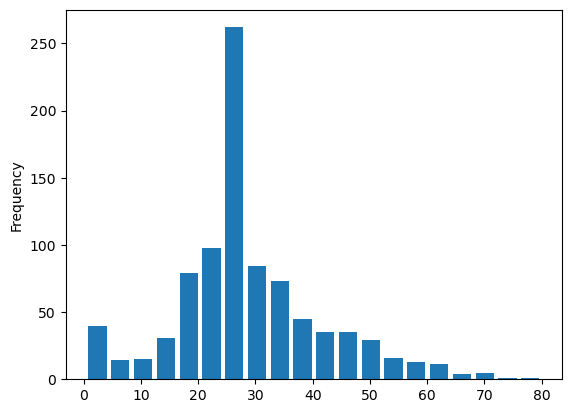

In [ ]:
#age열을 가지고 종류는 히스토그램, 막대개수는 20개,  막대폭은 80%이다.20개의 구간으로 나눈 히스토그램을 그리되, 막대 사이 간격을 0.8로 설정하는 명령
titanic_df['Age'].plot(kind='hist', bins=20, rwidth=0.8)

In [ ]:
#cabin 열에서 중복값 제외하고 유일한 값을 출력하되, tolist 파이썬리스트로 변환해라
titanic_df['Cabin'].unique().tolist()


['Unknown',
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',

In [ ]:
#cabin열에 비어있는 값을 Unknown으로 채우되, 원본을 직접 수정하라. object면 범주형, int, float는 수치형
titanic_df['Cabin'].fillna('Unknown', inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Cabin 열에서 각 객실이 몇 번 등장했는지 세고, 등장 횟수가 많은 순서대로 상위 10개를 보여주는 명령. 
# titanic_df['Cabin'] → Cabin 열 선택
#.value_counts() → 각 값의 등장 횟수 계산
#.head(10) → 상위 10개만 출력
titanic_df['Cabin'].value_counts().head(10)

Cabin
Unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
D                3
E101             3
C22 C26          3
F33              3
C83              2
Name: count, dtype: int64

In [ ]:
#sex컬럼에 있는 값을 출력하되 중복없는 값을 보여줘
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
#원-핫 인코딩 (One-Hot Encoding): One-Hot Encoding은 범주형 데이터(문자 데이터)를 0과 1로 이루어진 여러 개의 열로 바꾸는 방법

In [ ]:
#판다스에서 타이타닉 데이터안에 있는 sex, embarked 컬럼에서 상위 1개 목록만 가져오되, get_dummies즉 문자로 된 범주형 데이터를 true, false 불리언 값으로 만들어달라. 나중에 머신러닝은 문자형 범주를 이해하지 못하기 때문에 숫자형으로 바꿔줌
pd.get_dummies(titanic_df, columns=['Sex', 'Embarked']).head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,Unknown,False,True,False,False,True


In [ ]:
#sex열을 가져오되 male과 female에 각각 지정한 값을 넣어라. map의 역할은 값 하나하나를 (_)안에 정한대로 각각 넣어라
titanic_df['Sex'].map({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64